In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
haberman=pd.read_csv('haberman.csv',header=None,names=['age','year','nodes','status'])

In [44]:
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [45]:
haberman.shape

(306, 4)

In [46]:
haberman.size

1224

In [47]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [48]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [49]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [50]:
#No null data and imbalanced dataset 

In [51]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


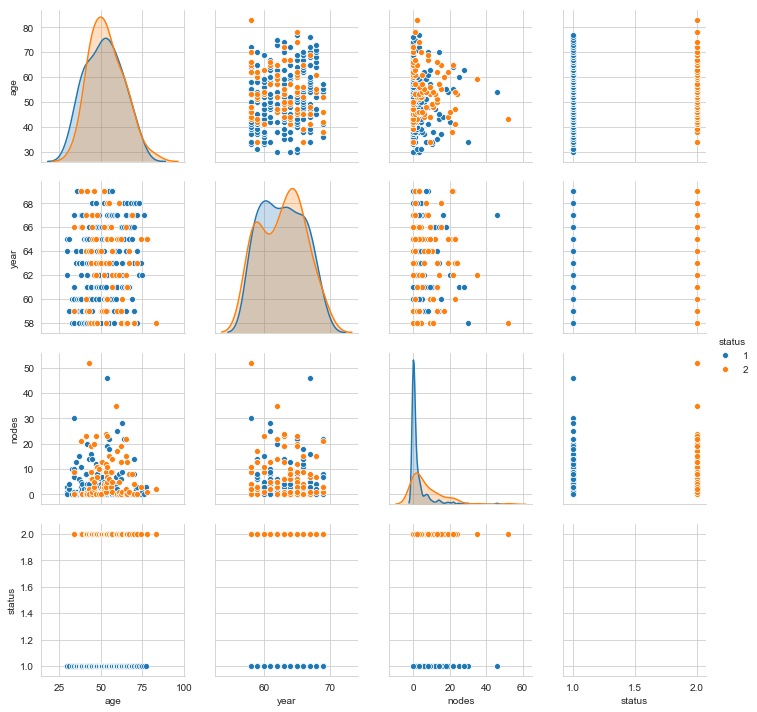

In [61]:
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='status')
plt.grid()
plt.show()

In [62]:
haberman_1=haberman[haberman['status']==1]
haberman_2=haberman[haberman['status']==2]

In [70]:
counts_1,bin_edges_1=np.histogram(haberman_1,bins=10,density=True)
counts_2,bin_edges_2=np.histogram(haberman_2,bins=10,density=True)

In [71]:
pdf_1=counts_1/sum(counts_1)
cdf_1=np.cumsum(pdf_1)
pdf_2=counts_2/sum(counts_2)
cdf_2=np.cumsum(pdf_2)

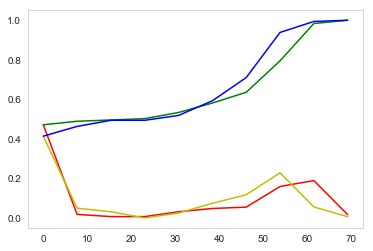

In [73]:
plt.plot(bin_edges[:-1],pdf_1,'r')
plt.plot(bin_edges[:-1],cdf_1,'g')
plt.plot(bin_edges[:-1],pdf_2,'y')
plt.plot(bin_edges[:-1],cdf_2,'b')
plt.grid()

In [74]:
np.mean(haberman_1)

age       52.017778
year      62.862222
nodes      2.791111
status     1.000000
dtype: float64

In [75]:
np.mean(haberman_2)

age       53.679012
year      62.827160
nodes      7.456790
status     2.000000
dtype: float64

In [81]:
print(np.median(haberman_1['age']))
print(np.median(haberman_1['year']))
print(np.median(haberman_1['nodes']))
print(np.median(haberman_1['status']))

52.0
63.0
0.0
1.0


In [83]:
print(np.median(haberman_2['age']))
print(np.median(haberman_2['year']))
print(np.median(haberman_2['nodes']))
print(np.median(haberman_2['status']))

53.0
63.0
4.0
2.0


In [85]:
from statsmodels import robust

In [86]:
robust.mad(haberman_1)

array([13.34341997,  4.44780666,  0.        ,  0.        ])

In [87]:
robust.mad(haberman_2)

array([11.86081775,  4.44780666,  5.93040887,  0.        ])

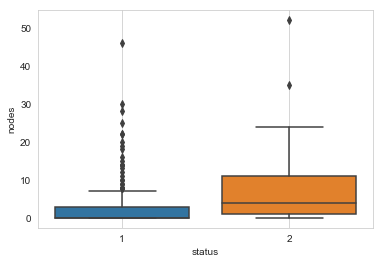

In [92]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.grid()
plt.show()

C:\Users\anchal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


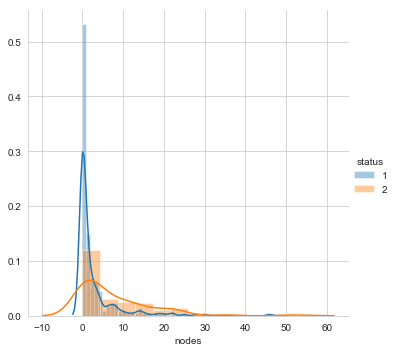

In [94]:
sns.FacetGrid(haberman, hue='status', size = 5) \
    .map(sns.distplot, 'nodes') \
    .add_legend();
plt.show();

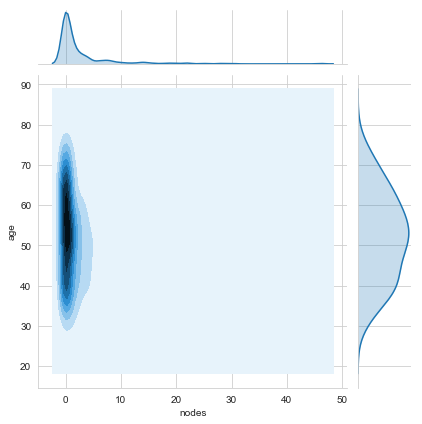

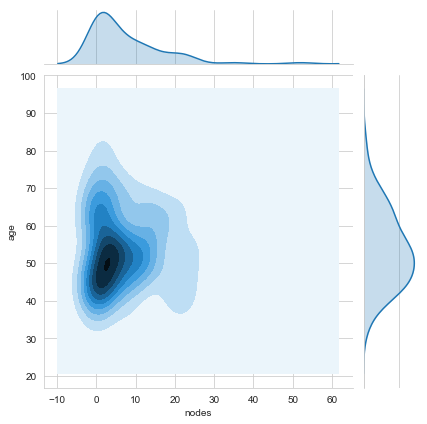

In [97]:
sns.jointplot(x='nodes',y='age',data=haberman_1,kind='kde')
sns.jointplot(x='nodes',y='age',data=haberman_2,kind='kde')
plt.grid()